In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate

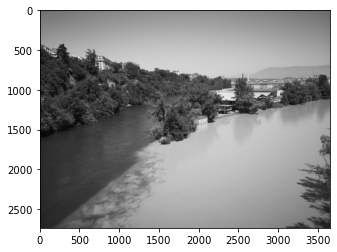

In [2]:
x = np.load('jonction.npz')['data']
plt.imshow(x,cmap="gray")
plt.show()
y = np.random.randn(len(x))
x = x.astype('float').reshape(-1)

def assert_data_range(x):
    return -5 <= x.all() <= 5

### 1 - rescale data

In [3]:
x = 5 * (x - np.mean(x)) / np.max(np.abs(x - np.mean(x)))
# rescaling between -5 and 5
y = np.random.randn(len(x))
y = y[-5 < y]
y = y[y < 5]

### 2 - display histogram

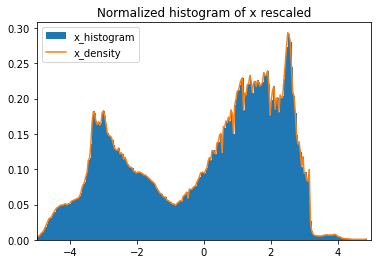

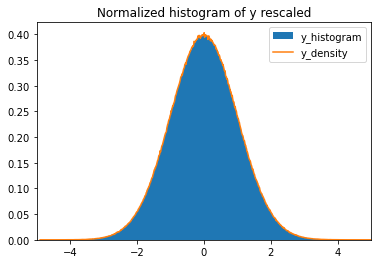

In [4]:
def pdf_hist(im, plot_name):
    h = plt.hist(im, bins='fd', density=True, label='%s_histogram' % plot_name)
    y,x = h[0],h[1]
    plt.plot(x[:-1], y, label='%s_density' % plot_name)
    plt.title('Normalized histogram of %s rescaled' %plot_name)
    plt.xlim([-5,5])
    plt.legend()
    plt.show()
    return x, y

x_X, y_X = pdf_hist(x,'x')
x_Y, y_Y = pdf_hist(y,'y')

### 3 - Define and plot the moment-generating functions

In [5]:
def mfX(t, x_X, y_X):
    return np.dot(y_X * np.exp(t * x_X[:-1]), x_X[1:] - x_X[:-1])

def mfY(t):
    return integrate.quad(lambda x: np.exp(-x ** 2 / 2) * np.exp(x * t) / np.sqrt(2 * np.pi), -5, 5)[0]

### 4 - Find the 7 first moments

In [6]:
def moments(data, n):
    return [np.sum((data) ** k) / len(data) for k in range(n)]

def amf(t, m):
    u = [t ** k / np.math.factorial(k) for k in range(len(m))]
    return np.dot(u, m)

In [8]:
n_m = 7
m_X = moments(x, n_m)
print('Moments of X : ', m_X)
m_Y = moments(y, n_m)
print('Moments of Y : ', m_Y)

Moments of X :  [1.0, 5.48443567728444e-15, 4.969513782353428, -4.623405633388906, 45.058973938097395, -86.27514065057433, 542.9180664370957]
Moments of Y :  [1.0, 0.0003855931791905327, 1.0000755504445094, 0.0009402074440729503, 2.998895800364789, 0.012145451654388146, 14.974178113627703]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate

x = np.load('jonction.npz')['data']
plt.imshow(x)
plt.show()


# Q1.----------------------------------------------------------
x = x.astype('float').reshape(-1)
# centering the data with formula question 1.
x = 5 * (x - np.mean(x)) / np.max(np.abs(x - np.mean(x)))
# rescaling between -5 and 5
y = np.random.randn(len(x))
y = y[-5 < y]
y = y[y < 5]




# Q2.-----------------------------------------------------------
def histProbDensity(data, name):
    h = plt.hist(data, bins='fd', density=True, label='%s_histogram' % name, color='pink')
    y = h[0]
    x = h[1]
    plt.plot(x[:-1], y, label='%s_density' % name, color='purple')
    plt.title('Normalized histogram of %s rescaled' %name)
    plt.xlim([-5,5])
    plt.legend()
    plt.show()
    return x, y


x_X, y_X = histProbDensity(x,'x')
x_Y, y_Y = histProbDensity(y,'y')


# Q3.--------------------------------------------------------------
# the moment generating function of X
def mfX(t):
    print("HERE -> ", t.shape, x_X.shape)
    assert -5 <= t <= 5, "the function is defined between -5 and 5"
    return np.dot(y_X * np.exp(t * x_X[:-1]), x_X[1:] - x_X[:-1])


# the moment generating function of Y
def mfY(t):
    assert -5 <= t <= 5, "the function is defined between -5 and 5"
    return integrate.quad(lambda x: np.exp(-x ** 2 / 2) * np.exp(x * t) / np.sqrt(2 * np.pi), -5, 5)[0]



# Q4.--------------------------------------------------------------
# to get the 7 first moments
def moments(data, nfirst):
    return [np.sum((data) ** k) / len(data) for k in range(nfirst)]


# to approximating moment generating function
def amf(t, moments):
    assert -5 <= t <= 5, "the function is defined between -5 and 5"
    u = [t ** k / np.math.factorial(k) for k in range(len(moments))]
    return np.dot(u, moments)



n_moments = 7
m_X = moments(x, n_moments)
print('Moments of X : ', m_X)
m_Y = moments(y, n_moments)
print('Moments of Y : ', m_Y)


# Q5.---------------------------------------------------------------
# to plot one generating function
def plotting_mgf(mgf, name=None, xmin=-5, xmax=5):
    xs = np.arange(xmin, xmax, 0.1)
    plt.plot(xs, [mgf(x) for x in xs], label=name)


# to plot all the moment of the generating function
def plotting_mgfs(mgf, mm, name, xmin, xmax):
    plt.figure()
    plotting_mgf(mgf, name='%s_exact' % name, xmin=xmin, xmax=xmax)
    for k in range(len(mm)):
        plotting_mgf(lambda t: amf(t, mm[:k + 1]), name='%s_approx %i' % (name, k), xmin=xmin, xmax=xmax)
    plt.xlabel('t')
    plt.ylabel('Approximation of M_%s' %name)
    plt.title('Approximation of the moment-generating function')
    plt.legend()
    plt.show()

# Only between -1 and 1 because of the errors of approx far from 0
plotting_mgfs(mfX, m_X, name='X', xmin=-1, xmax=1)
plotting_mgfs(mfY, m_Y, name='Y', xmin=-1, xmax=1)